This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

Import the count matrix from `computeMatrix`.

In [2]:
# First two: CREs (loop region, not precise enhancer)
CREs = pd.read_csv('matrix_CREs.tab', header=0, sep='\t')
loops_without_CREs = pd.read_csv('matrix_loops_without_CREs.tab', header=0, sep='\t')
enhancers = pd.read_csv('matrix_enhancers.tab', header=0, sep='\t')
loops_without_enhancers = pd.read_csv('matrix_loops_without_enhancers.tab', header=0, sep='\t')

Aggregate the RPKM values for all the bins (columns) for each region.

In [3]:
CREs_CTRL = CREs.filter(regex = 'CTRL').sum(axis=1)
CREs_KD = CREs.filter(regex = 'KD').sum(axis=1)
CREs_plot = pd.DataFrame({'CTRL': CREs_CTRL,'KD': CREs_KD})

In [4]:
loops_without_CREs_CTRL = loops_without_CREs.filter(regex = 'CTRL').sum(axis=1)
loops_without_CREs_KD = loops_without_CREs.filter(regex = 'KD').sum(axis=1)
loops_without_CREs_plot_no_size_match = pd.DataFrame({'CTRL': loops_without_CREs_CTRL,'KD': loops_without_CREs_KD})

# Size matching
loops_without_CREs_plot = loops_without_CREs_plot_no_size_match.sample(n = CREs_plot.shape[0])

In [5]:
enhancers_CTRL = enhancers.filter(regex = 'CTRL').sum(axis=1)
enhancers_KD = enhancers.filter(regex = 'KD').sum(axis=1)
enhancers_plot = pd.DataFrame({'CTRL': enhancers_CTRL,'KD': enhancers_KD})

In [6]:
loops_without_enhancers_CTRL = loops_without_enhancers.filter(regex = 'CTRL').sum(axis=1)
loops_without_enhancers_KD = loops_without_enhancers.filter(regex = 'KD').sum(axis=1)
loops_without_enhancers_plot_no_size_match = pd.DataFrame({'CTRL': loops_without_enhancers_CTRL,'KD': loops_without_enhancers_KD})

# Size matching
loops_without_enhancers_plot = loops_without_enhancers_plot_no_size_match.sample(n = enhancers_plot.shape[0])
# Randomly sample 272 rows to size match with the interacting loops. This is because the variance of the interact loops are drastically higher than the non-interaction loops. t test has to assume equal variance
# non_interact_plot_sample_1 = non_interact_plot_1.sample(n = 272)

Perform statistical test

In [7]:
scipy.stats.ttest_ind(CREs_plot['CTRL'], CREs_plot['KD'])

Ttest_indResult(statistic=0.9610291865000232, pvalue=0.3374735363100396)

In [8]:
scipy.stats.ttest_ind(loops_without_CREs_plot['CTRL'], loops_without_CREs_plot['KD'])

Ttest_indResult(statistic=2.1633006138267947, pvalue=0.030560190345020173)

In [9]:
scipy.stats.ttest_ind(enhancers_plot['CTRL'], enhancers_plot['KD'])

Ttest_indResult(statistic=3.090238902106955, pvalue=0.0020460588465346483)

In [10]:
scipy.stats.ttest_ind(loops_without_enhancers_plot['CTRL'], loops_without_enhancers_plot['KD'])

Ttest_indResult(statistic=43.58482055052735, pvalue=0.0)

Plot

In [11]:
CREs_plot['sample']='CREs'
loops_without_CREs_plot['sample']='loops_without_CREs'
enhancers_plot['sample']='enhancers'
loops_without_enhancers_plot['sample']='loops_without_enhancers'

In [12]:
CREs_plot = pd.melt(CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_without_CREs_plot = pd.melt(loops_without_CREs_plot,id_vars='sample',var_name="condition",value_name="RPKM")
enhancers_plot = pd.melt(enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")
loops_without_enhancers_plot = pd.melt(loops_without_enhancers_plot,id_vars='sample',var_name="condition",value_name="RPKM")

In [13]:
final_plot=CREs_plot.append(loops_without_CREs_plot)
final_plot=final_plot.append(enhancers_plot)
final_plot=final_plot.append(loops_without_enhancers_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


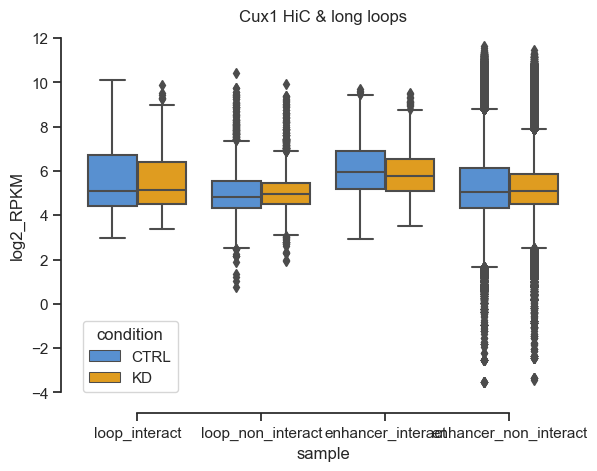

In [15]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(
	x="sample", 
	y="log2_RPKM",
	hue="condition",
	palette=my_pal,
	data=final_plot
).set_title("Cux1 HiC & long loops")
sns.despine(offset=10, trim=True)